In [122]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm", "lines.linewidth": 1})
pi = np.pi

In [123]:
def get_q_prime(z, q1):
    return q1 + z

def get_q2(z, q1, f):
    return ((1 - z/f) * q1 + f) / (-q1/f)

@np.vectorize
def get_q(z, q1, L1, f):
    if z < L1:
        return get_q_prime(z, q1)
    if z >= L1:
        return get_q2(z - L1, q1, f)
        
def get_R(q):
    return 1 / np.real(q**(-1))

def get_w(q, wl, n):
    return np.sqrt(-wl / (n * pi * np.imag(q**(-1))))

In [124]:
f = 100 # mm
L1, L2 = f, f # mm
wl = 632E-6 # mm
n = 1
z0 = 0 # mm
w1 = 1 # mm
q1 = 1j * (w1**2 * pi * n / wl)

C:\Users\Laevateinn\AppData\Local\Temp\ipykernel_22584\620323682.py:15: RuntimeWarning: divide by zero encountered in divide
  return 1 / np.real(q**(-1))


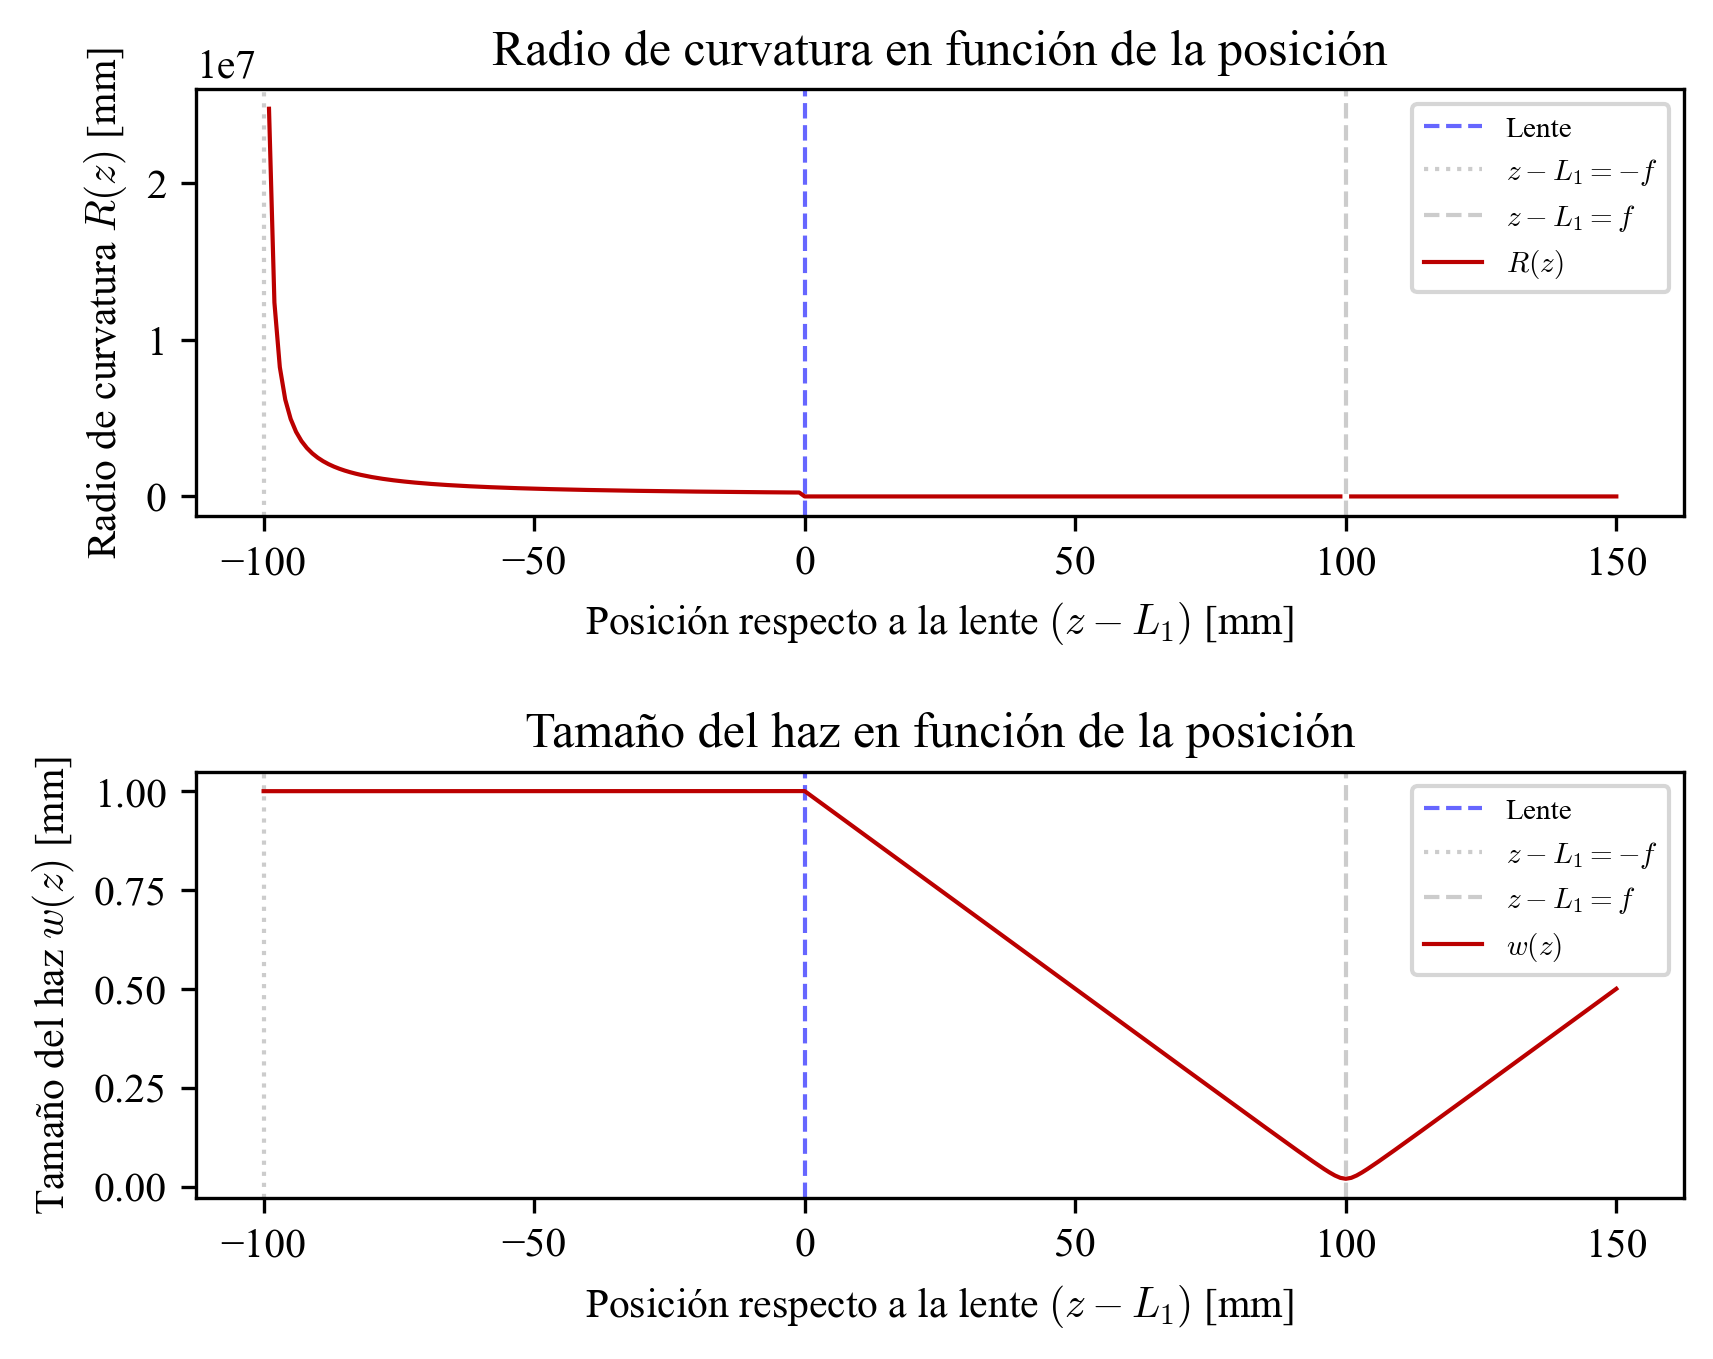

In [169]:
z_step = 1 # mm
z = np.arange(0, (L1 + 1.5*L2) + z_step, z_step)
q = get_q(z, q1, L1, f)
R = get_R(q)
w = get_w(q, wl, n)

fig, axs = plt.subplot_mosaic([["R"], ["w"]], dpi=300)

for ax_label in axs:
    axs[ax_label].axvline(0, color="#66f", ls="--", label="Lente")
    axs[ax_label].axvline(-f, color="#ccc", ls=":", label="$z - L_1 = -f$")
    axs[ax_label].axvline(f, color="#ccc", ls="--", label="$z - L_1 = f$")

axs["R"].set(xlabel="Posición respecto a la lente $(z - L_1)$ [mm]", ylabel="Radio de curvatura $R(z)$ [mm]",
             title="Radio de curvatura en función de la posición")
axs["w"].set(xlabel="Posición respecto a la lente $(z - L_1)$ [mm]", ylabel="Tamaño del haz $w(z)$ [mm]",
             title="Tamaño del haz en función de la posición")

axs["R"].plot((z - L1), R, color="#b00", label="$R(z)$")
axs["w"].plot(z - L1, w, color="#b00", label="$w(z)$")

for ax_label in axs: axs[ax_label].legend(fontsize=7)

plt.subplots_adjust(hspace=0.6)
plt.savefig("R_w.png", dpi=300)

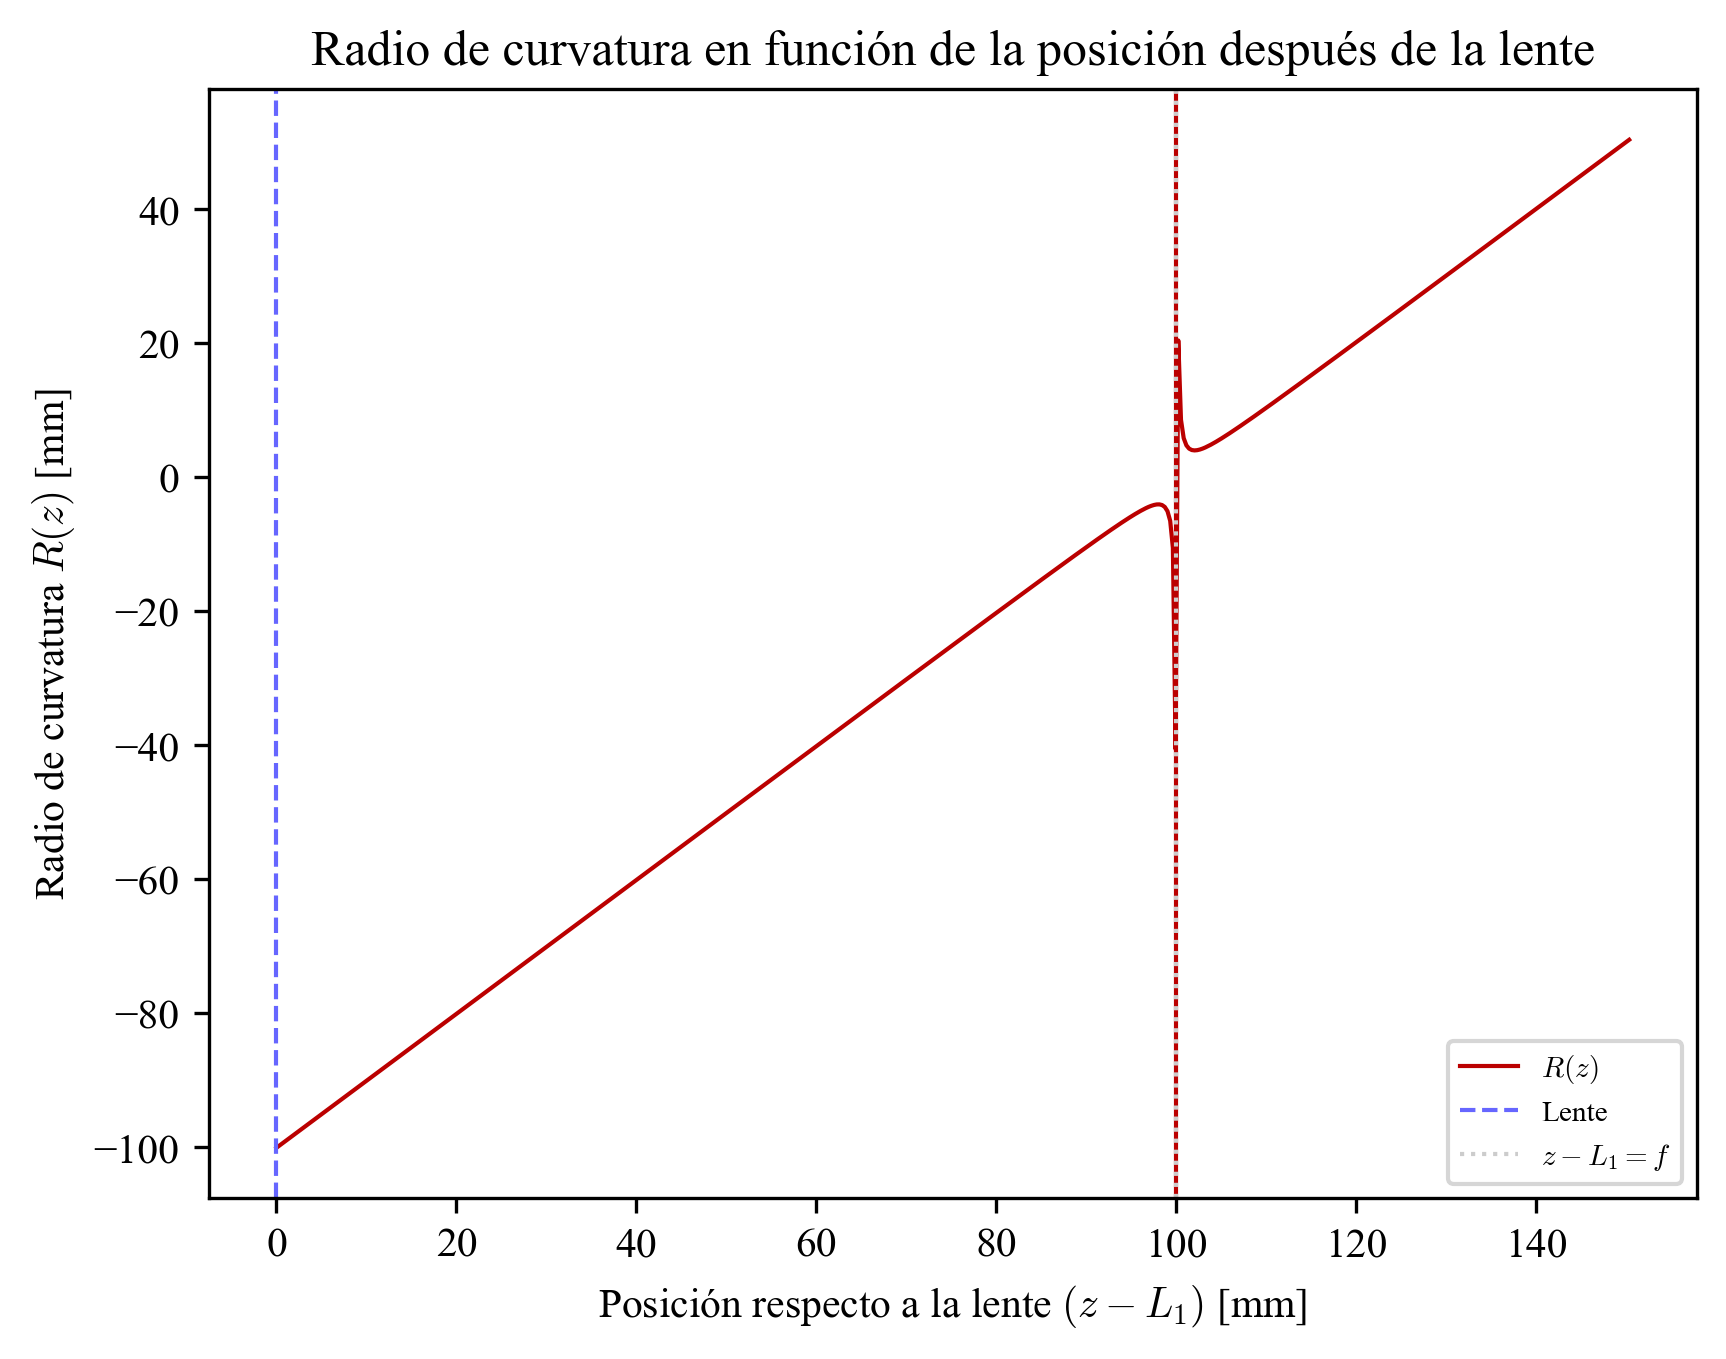

In [168]:
z_step = 0.3 # mm
z = np.arange(L1, (L1 + 1.5*L2) + z_step, z_step)
q = get_q(z, q1, L1, f)
R = get_R(q)

fig, ax = plt.subplots(dpi=300)

ax.set(xlabel="Posición respecto a la lente $(z - L_1)$ [mm]", ylabel="Radio de curvatura $R(z)$ [mm]",
       title="Radio de curvatura en función de la posición después de la lente")


ax.plot((z - L1), R, color="#b00", label="$R(z)$")
ax.axvline(f, color="#b00", label="")
ax.axvline(0, color="#66f", ls="--", label="Lente")
ax.axvline(f, color="#ccc", ls=":", label="$z - L_1 = f$")
ax.legend(fontsize=7)

plt.subplots_adjust(hspace=0.5)
plt.savefig("R.png", dpi=300)